In [ ]:
import json
import os
import math
from tqdm import tqdm

def load_game(filename: str) -> dict:
    """Load game data from a JSON file."""
    with open(filename, 'r') as file:
        data = json.load(file)
    return data


games = []
game_path = os.path.join(".", "crawler", "games", "classic")

for file in tqdm(os.listdir(game_path)):
    if file.endswith(".json"):
        game_data = load_game(os.path.join(game_path, file))
        games.append(game_data)

print(f"Loaded {len(games)} games.")

players = []
players_name_lvl = {}
for game in tqdm(games):
    for participant in game.get("info").get("participants", []):
        players_name_lvl[participant.get("riotIdGameName") + " #" + participant.get("riotIdTagline")] = participant.get("summonerLevel", 0)

for name, level in players_name_lvl.items():
    players.append((name, level))

print(f"Unique players: {len(players)}")



  0%|          | 0/23575 [00:00<?, ?it/s]

 35%|███▍      | 8243/23575 [00:38<00:57, 268.41it/s]

In [ ]:
from analysis.core import *

In [33]:
len(get_all_participants(games))

NameError: name 'tqdm' is not defined

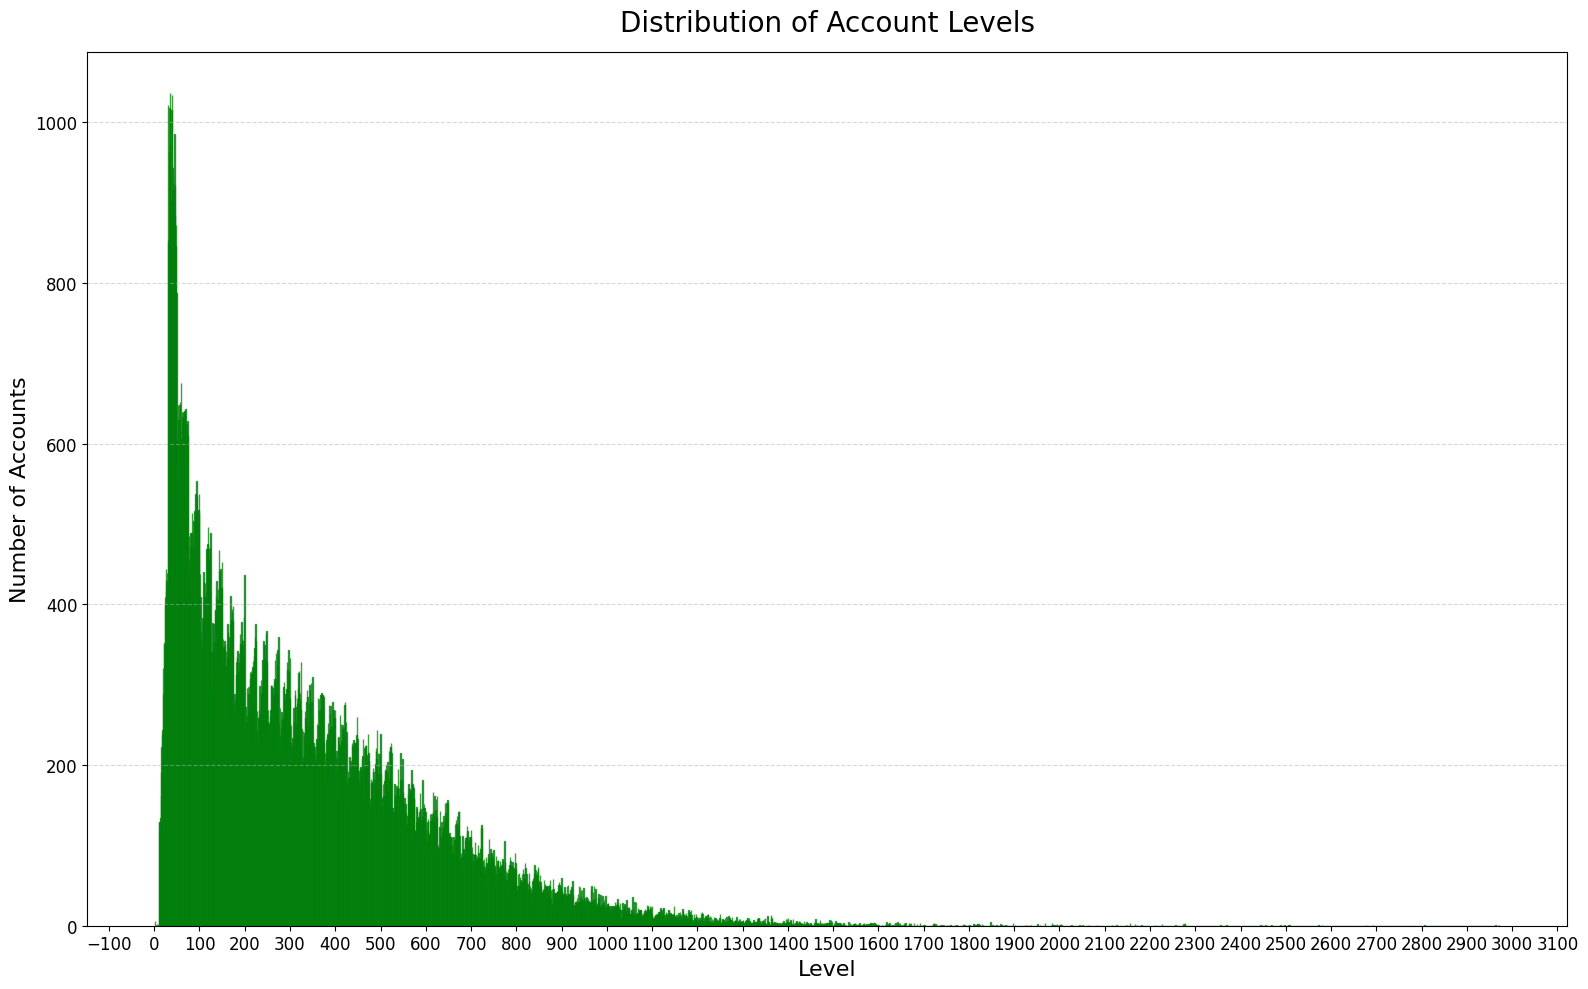

"Qnoxs #17165" Level: 2971


In [15]:
plot_level_distribution(games)
hname, hlevel = get_highest_level_player(games)
print(f"\"{hname}\" Level: {hlevel}")

  0%|          | 0/61 [00:00<?, ?it/s]

100%|██████████| 61/61 [00:28<00:00,  2.15it/s]


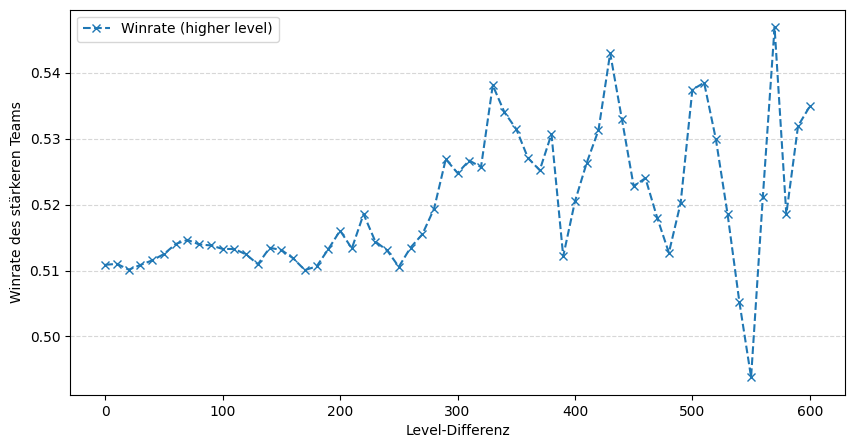

In [18]:
import matplotlib.pyplot as plt

diffs = [i * 10 for i in range(0, 61)]
winrates = [higher_level_winrate(games, d) for d in tqdm(diffs)]

plt.figure(figsize=(10, 5))
plt.plot(diffs, winrates, marker="x", linestyle="--", label="Winrate (higher level)")

#plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
#plt.yticks([i/10 for i in range(0, 11)])

plt.xlabel("Level-Differenz")
plt.ylabel("Winrate des stärkeren Teams")
plt.legend()
plt.show()


100%|██████████| 101/101 [00:50<00:00,  2.00it/s]


[0.5077390694411971, 0.5075888568683957, 0.5084352801894239, 0.5085175420807139, 0.5092075747300329, 0.5096396541539122, 0.5105475887270915, 0.5108714261256634, 0.5102462646902498, 0.510569403714565, 0.5109162039374053, 0.5106758080313418, 0.5095881161377448, 0.509990219365656, 0.5104890046296297, 0.5111825865808961, 0.5112939532717534, 0.5123720480373982, 0.5131754503002002, 0.5148497705429042, 0.5148541591645661, 0.5157432495561992, 0.5164054132995813, 0.5165871969158974, 0.5146469968387777, 0.5134868421052632, 0.5151098901098901, 0.5151515151515151, 0.5133723099888046, 0.5146697686441774, 0.5144586415601883, 0.5136049626392217, 0.5139154763657783, 0.5145929339477726, 0.5146752205292703, 0.5176827214550354, 0.5177566807313643, 0.5197792088316467, 0.5217474980754426, 0.5201612903225806, 0.5182773109243698, 0.519184389388292, 0.5191469846365513, 0.5190876350540216, 0.5202108963093146, 0.5189203492987563, 0.5202665186007773, 0.5183033120278907, 0.5179063360881543, 0.5176735218508998, 0.

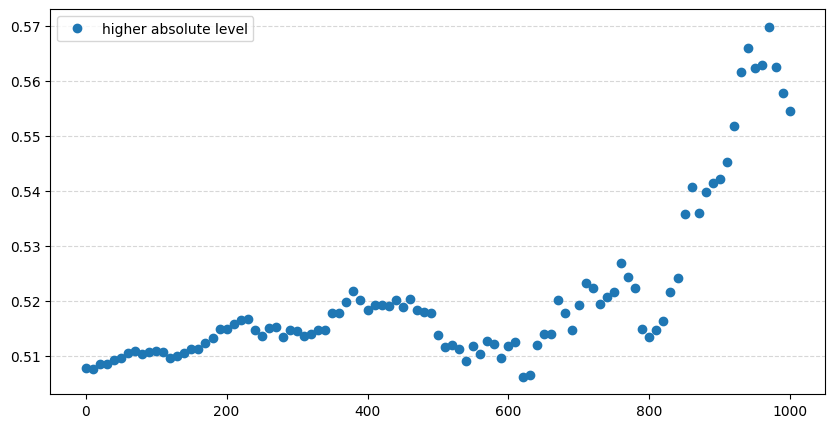

In [19]:
import matplotlib.pyplot as plt

diffs = [i * 10 for i in range(0, 101)]
winrates_higher = [higher_absolute_level_winrate(games, d) for d in tqdm(diffs)]

print(winrates_higher)
plt.figure(figsize=(10, 5))

plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.yticks([i/100 for i in range(0, 101)])
plt.plot(diffs, winrates_higher, marker="o", linestyle="", label="higher absolute level")
plt.legend()
plt.show()

(21828.2, 18631.0)
[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000]
20550 Wins with higher champion level and 836 Wins with lower champion level of 21386 games
20147 Wins with higher champion level and 685 Wins with lower champion level of 20832 games
19947 Wins with higher champion level and 614 Wins with lower champion level of 20561 games
19789 Wins with higher champion level and 563 Wins with lower champion level of 20352 games
19628 Wins with higher champion level and 524 Wins with lower champion level of 20152 games
19453 Wins with higher champion level and 470 Wins with lower champion level of 19923 games
19256 Wins with higher champion level and 418 Wins with lower champion lev

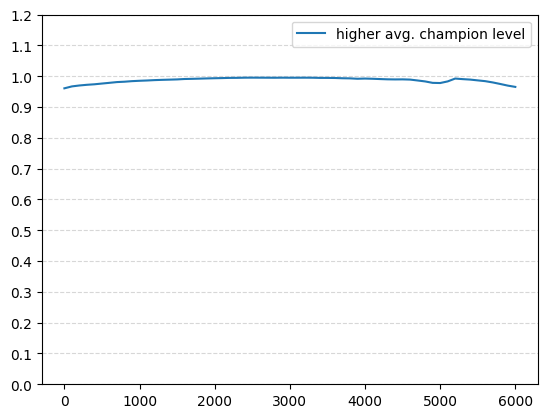

In [20]:
import matplotlib.pyplot as plt
print(get_team_champion_levels(games[1]))
diffs = [i * 100 for i in range(0, 61)]
winrates_higher = []
winrates_lower = []
print(diffs)
for d in diffs:
    wr = higher_champion_level_winrate(games, d)
    winrates_higher.append(wr)
print(winrates_higher)
plt.ylim(0, 1.2)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.yticks([i/10 for i in range(0, 13)])
plt.plot(diffs, winrates_higher, label="higher avg. champion level")
#plt.plot(diffs, winrates_lower, label="lower avg. level")
plt.legend()
plt.show()

In [21]:
print(get_percentage_of_surrendered_games(games))

0.29146033822292816
